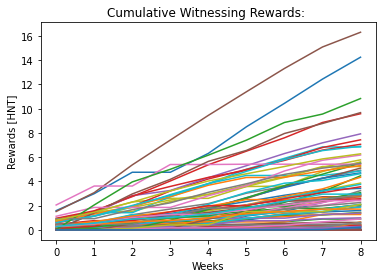

In [38]:
# <!---
# This program outputs the number of data packets transferred on a weekly basis through all the hotspots in a selected perimeter
# -->

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

dict1 = {}
dict2 = {}


lat = "36.871705"
lon = "-76.277318"


url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=500"
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=500"
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

minTime = []
maxTime = []
current_date = date.today()

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])
    
for i in range(1,10):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=7)
    minTime.append(priorDate)
    current_date = priorDate    


dataPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())

dict = {}
sum1 = 0
cursor = ''
for a in dataPerAddress:
    print("Current address: ", a)
    for t in range(len(minTime)):            
        url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        dict = json.loads(requests.get(url).text)
        time.sleep(1)
        while "cursor" in dict:
            for i in range(len(dict['data'])):            
                sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            cursor = dict['cursor']
            url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
            url = url + "&cursor=" + cursor
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
        else:
            try:
                for i in range(len(dict['data'])):            
                    sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            except:
                print("error no data key for ", a)

        dataPerAddress[a].append(sum1)
        sum1 = 0
    dataPerAddress[a].reverse()
    print(dataPerAddress[a])
    
#     plt.plot(dataPerAddress[a])
#     plt.plot(np.cumsum((dataPerAddress)[a]))
#     plt.show()
#     plt.bar(range(9), dataPerAddress[a])
#     plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(list(dataPerAddress.values())[a])
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Data Packets Transferred: ")
#         plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(np.cumsum(list(dataPerAddress.values())[a]))
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Cumulative Data Packets Transferred: ")
#         plt.show()
        
dict.clear()
sum1=0
cursor=''
print(len(dataPerAddress))


dict_keys(['11MrT1pSG7JZS51KBtieiHkAT9LCQvfkafa7qmEzcqoZVPc5M5w', '11yWfEwtSGLw3Vdh4iWgqnuKXRxELUkwN2v5wmB32UaRkq2YQWE', '113rdGpZkFNybwdZTi9B2o1GbysioAV4btPDX5uM2zfNcKDhfvQ'])
Current address:  11MrT1pSG7JZS51KBtieiHkAT9LCQvfkafa7qmEzcqoZVPc5M5w
[125, 168, 262, 155, 39, 61, 144, 46, 82]
Current address:  11yWfEwtSGLw3Vdh4iWgqnuKXRxELUkwN2v5wmB32UaRkq2YQWE
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Current address:  113rdGpZkFNybwdZTi9B2o1GbysioAV4btPDX5uM2zfNcKDhfvQ
[0, 0, 0, 0, 0, 0, 0, 0, 0]
3


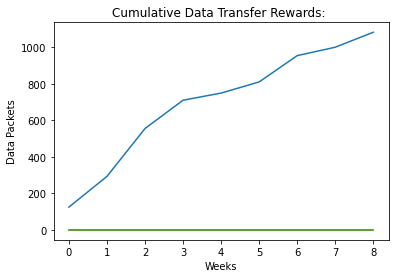

In [39]:
import pickle

scen = 'Topeka'
with open(scen+"_dataPerAddress_20mile.pkl", 'wb') as fh:
    pickle.dump(dataPerAddress, fh)

file = open("Topeka_dataPerAddress_20mile.pkl", 'rb')
loadedDPA = pickle.load(file)
len(loadedDPA)
from matplotlib import pyplot as plt
for a in range(len(loadedDPA)):    
    plt.plot(np.cumsum(list(loadedDPA.values())[a]))
    #if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
    
plt.xlabel("Weeks")
plt.ylabel("Data Packets")
plt.title("Cumulative Data Transfer Rewards: ")
#plt.legend()
plt.show()